# Расчет конверсии рекламной компании

Есть датасет с данными о рекламной компании.

<b>Описание данных</b>:

- ad_id – идентификатор объявления (рекламы)
- xyz_campaign_id – идентификатор рекламной кампании в базе компании X
- fb_campaign_id – идентификатор кампании в Facebook
- age – возрастная группа, которой показывалась реклама
- gender – пол тех, кому показывалась реклама
- interest – код, указывающий категорию, к которой относится интерес пользователя (условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)
- impressions – число показов
- clicks – число кликов
- spent – сумма, которую компания потратила на показ объявления 
- total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
- approved_conversion – количество людей, которые купили продукт после просмотра рекламы

<b>Задачи</b>:

1. Загрузить данные и изучить их.
2. Построить график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
3. Создать новую колонку c CTR. Посмотреть на описательные статистики и распределение.
4. Проанализировать CTR с разбивкой по рекламной кампании.
5. Посчитать стоимость за клик пользователя по объявлению (CPC). Изучить полученные значения, используя меры центральной тенденции и меры изменчивости. 
6. Визуализировать CPC с разбивкой по полу пользователей, которым были показаны объявления. 
7. Посчитать конверсию из клика в покупку.

## Загрузка и изучение данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr
import warnings

# убрать предупреждение SettingWithCopy от библиотек pandas и sklearn
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
# устанавливаем размер графиков
sns.set(rc={'figure.figsize':(15,9)})

In [3]:
data = pd.read_csv('conversion.csv')

In [4]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
# Сколько уникальных рекламных кампаний было проведено? 
data.xyz_campaign_id.nunique()

3

In [7]:
# уникальные рекламные компании
data.xyz_campaign_id.unique()

array([ 916,  936, 1178])

В датасете 1143 наблюдения, 11 столбцов, пропусков нет. Столбец с деньгами в формате float, бакеты с возрастом и пол имеют тип object, остальные столбцы имеют целочисленный тип.

Всего уникальных кампаний было 3.

## График распределения числа показов

Построим график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения.

In [8]:
data_imp = data.groupby('fb_campaign_id', as_index=False).agg({'Impressions': 'sum'})
data_imp.head()

,fb_campaign_id,Impressions
0,103916,7350
1,103917,17861
2,103920,693
3,103928,8392
4,103929,1915


In [9]:
data_imp['log_impressions'] = np.log(data_imp['Impressions'])

In [10]:
data_imp.head()

,fb_campaign_id,Impressions,log_impressions
0,103916,7350,8.902456
1,103917,17861,9.790375
2,103920,693,6.541030
3,103928,8392,9.035034
4,103929,1915,7.557473


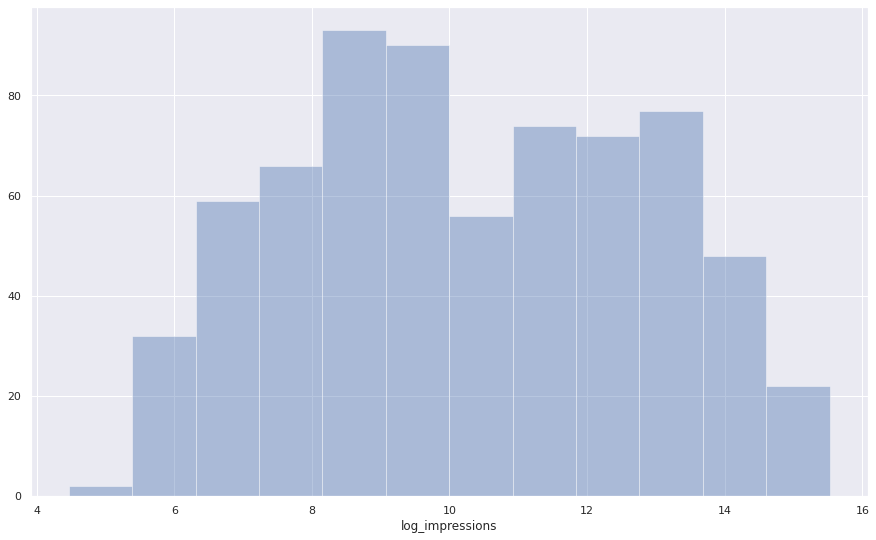

In [11]:
sns.distplot(data_imp.log_impressions, kde=False);

Получили бимодальное распределение, не являющееся нормальным.

## Метрика CTR

Посчитаем CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

In [12]:
data['ctr'] = data.Clicks / data.Impressions * 100

In [13]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195


In [14]:
data.ctr.describe()

count    1143.000000
mean        0.016420
std         0.011506
min         0.000000
25%         0.010022
50%         0.015981
75%         0.023364
max         0.105932
Name: ctr, dtype: float64

In [15]:
# ad_id объявления с наибольшим CTR
data.query('ctr == ctr.max()')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.105932


Визуализируем CTR рекламной кампании 916. У большей части объявлений нулевой CTR - то есть по этим объявлениям не было кликов.

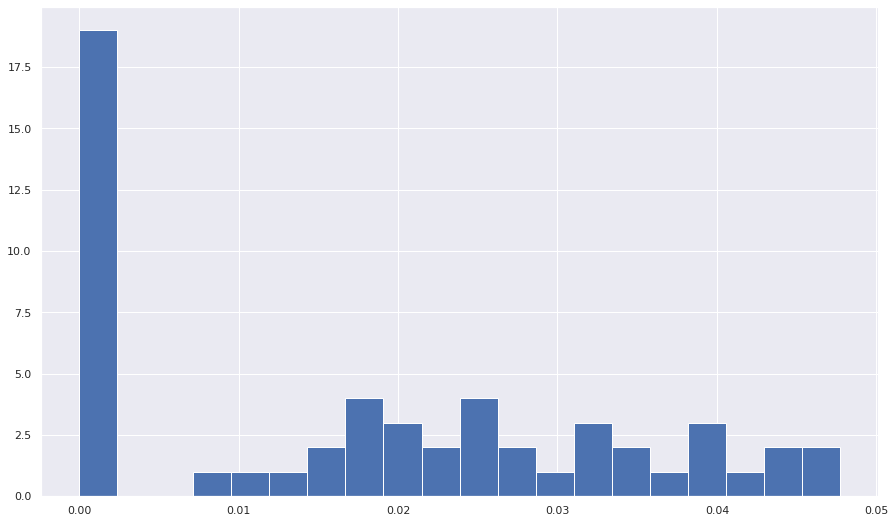

In [16]:
data.query('xyz_campaign_id == 916')['ctr'].hist(bins=20);

## Метрика PCP

Найдем CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов.

In [17]:
data['cpc'] = data.Spent / data.Clicks

In [18]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29


In [19]:
data.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

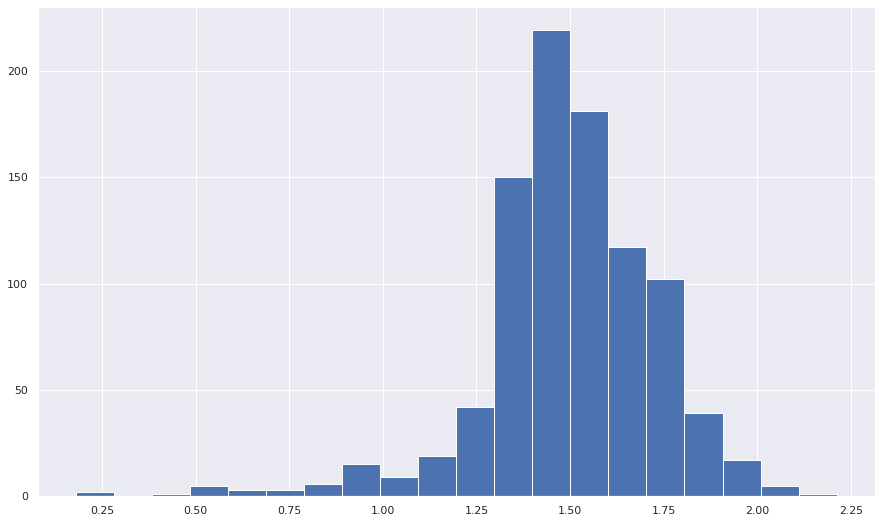

In [20]:
# распределение стоимости за клик
data['cpc'].dropna().hist(bins=20);

In [21]:
# межквартильный размах, округленный до двух знаков после точки, игнорируем пропуски в данных
print('Межквартильный размах PCP:', round(iqr(data.cpc, nan_policy='omit'), 2))

Межквартильный размах PCP: 0.25


Визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления.

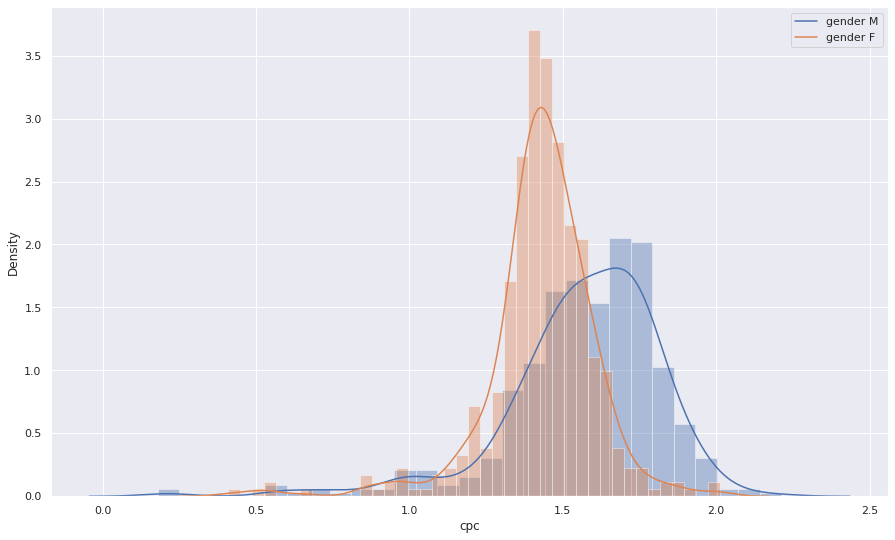

In [22]:
sns.distplot(data.query('gender == "M"').cpc.dropna())
sns.distplot(data.query('gender == "F"').cpc.dropna())
plt.legend(labels=['gender M','gender F'])
plt.show();

## Метрика Конверсия

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитаем конверсию из клика в покупку.

In [23]:
data['cr'] = round(data.Approved_Conversion / data.Clicks * 100, 2)

In [24]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,cr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29,100.0


In [25]:
# конверсия объявления 1121814
data.query('ad_id == 1121814')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,cr
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.018936,1.454394,3.09


## Выводы

В ходе данного проекта было сделано:
- загружен и изучен датасет
- построен график распределения числа показов для каждой рекламы
- рассчитан CTR и проанализирован с разбивкой по рекламной кампании
- рассчитан CPC и визуализирован с разбивкой по полу пользователей, которым были показаны объявления
- посчитана конверсия из клика в покупку